In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
# area will have more weightage => perform scaling
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features)) # initializing weights as 1 (unkown number of features => generalized)
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(w,X.T)+b     # w1*area+w2*bedrooms (need dot product) 
        # why transpose => one feature will be x and other will be y => need to multiply w1 only with x and w2 only with y

        # finding derivatives
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_pred))
        b_grad = -(2/total_samples)*np.sum(y_true-y_pred)

        w = w-learning_rate*w_grad
        b = b-learning_rate*b_grad

        cost = np.mean(np.square(y_true-y_pred))    # for plotting purpose

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

In [8]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

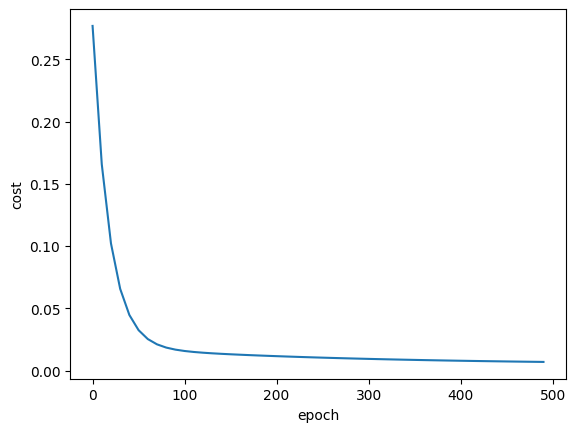

In [9]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [10]:
def predict(area,bedroom,w,b):
    scaled_X = sx.transform([[area,bedroom]])[0]       # transform expects a df or a 2d array
    scaled_price = w[0]*scaled_X[0]+w[1]*scaled_X[1]+b

    # we need to give the output in proper format
    return sy.inverse_transform([[scaled_price]])[0][0]

In [11]:
predict(2600,4,w,b)

C:\Users\Time\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [21]:
import random

def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_pred = np.dot(w,sample_x.T)+b     # instead of using x and y, we are using one sample
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_pred))
        b_grad = -(2/total_samples)*(sample_y-y_pred)

        w = w-learning_rate*w_grad
        b = b-learning_rate*b_grad

        cost = np.square(sample_y-y_pred)   # for plotting purpose

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

In [25]:
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd        # sgd needs more epochs to be run => reason => we are going through random samples, not every samples
                            # but still, computationally, it is lightweight

(array([0.70958197, 0.67725563]), -0.23272281461629582, 0.00950334341393858)

In [26]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

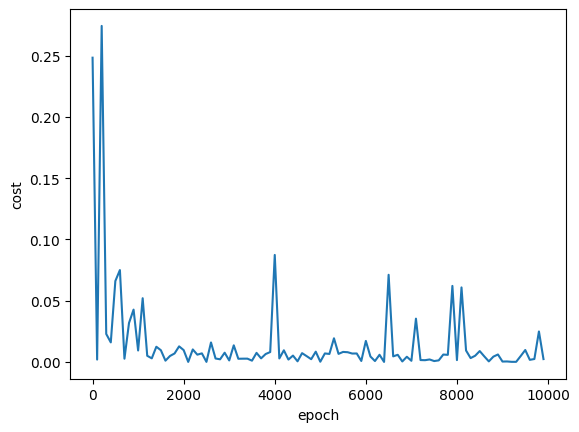

In [27]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)      # graph has bumps in between but eventually gets stable

In [28]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\Time\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.61262818175385